In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/weight-height.csv")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [16]:
X =  df[["Height"]].values #input, data
y_true = df[["Weight"]].values # output, answer


In [48]:
#Line Equation
def line(x, w=0, b=0):
    return w * x + b


#Loss Function
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

Text(0.5, 0, 'B')

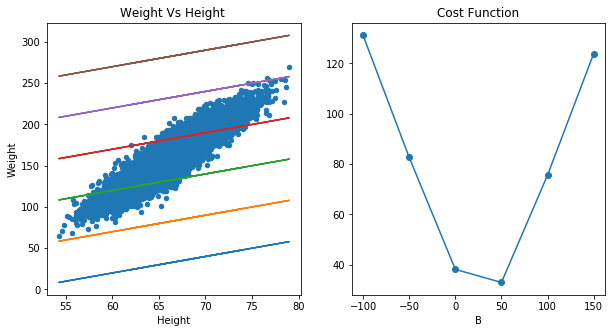

In [29]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Weight Vs Height ",
       ax=ax1)

bs = np.array([-100, -50,  0, 50, 100, 150])

mses = []
for b in bs:
    y_pred = line(X, w=2, b=b) # Adjust w and b for find best
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)
    
ax2 = plt.subplot(122)    
plt.plot(bs, mses, 'o-')
plt.title("Cost Function")
plt.xlabel("B")

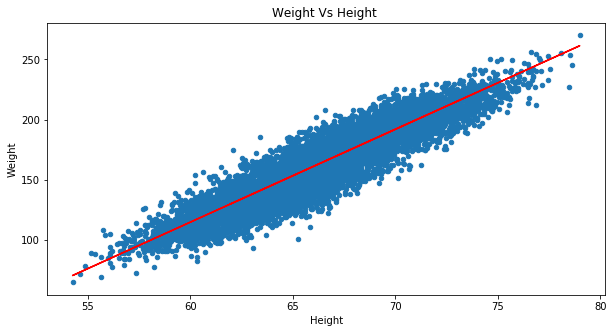

In [51]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(111)
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Weight Vs Height ",
       ax=ax1)

y_pred = line(X, w=7.717397, b=-348.28372) # Adjust w and b for find best
plt.plot(X, y_pred, color='red')


# Find W and B value with Deep Learning

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
print(X[:2])
print(y_pred[:2])

[[73.84701702]
 [68.78190405]]
[[297.69403404]
 [287.56380809]]


In [38]:
X.shape

(10000, 1)

In [39]:
model = Sequential()

#model Structure
model.add(Dense(1, input_shape=(1,)))


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(Adam(lr=0.8), "mean_squared_error")

In [42]:
model.fit(X, y_true, epochs = 40)

Epoch 1/40
313/313 [==============================] - 1s 2ms/step - loss: 1273.3169
Epoch 2/40
313/313 [==============================] - 1s 2ms/step - loss: 556.0624
Epoch 3/40
313/313 [==============================] - 1s 2ms/step - loss: 536.0585
Epoch 4/40
313/313 [==============================] - 1s 2ms/step - loss: 497.5398
Epoch 5/40
313/313 [==============================] - 1s 2ms/step - loss: 461.9919
Epoch 6/40
313/313 [==============================] - 1s 2ms/step - loss: 411.0712
Epoch 7/40
313/313 [==============================] - 1s 2ms/step - loss: 374.9945
Epoch 8/40
313/313 [==============================] - 1s 2ms/step - loss: 354.4338
Epoch 9/40
313/313 [==============================] - 1s 2ms/step - loss: 318.0846
Epoch 10/40
313/313 [==============================] - 1s 2ms/step - loss: 287.7704
Epoch 11/40
313/313 [==============================] - 1s 2ms/step - loss: 272.8550
Epoch 12/40
313/313 [==============================] - 1s 2ms/step - loss: 242.6550


In [44]:
y_pred = model.predict(X)
y_pred

array([[221.62302],
       [182.53354],
       [223.65341],
       ...,
       [144.61093],
       [184.48093],
       [129.76462]], dtype=float32)

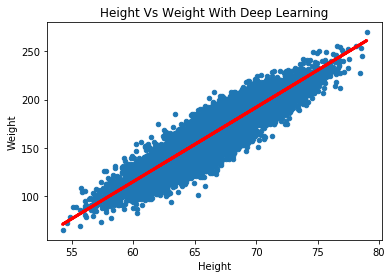

In [45]:
df.plot(kind="scatter",
       x="Height",
       y="Weight",
       title = "Height Vs Weight With Deep Learning")
plt.plot(X, y_pred, color='red', linewidth=3)

In [46]:
w, b = model.get_weights()
print(w, b, sep="\n\n")

[[7.717397]]

[-348.28372]


In [47]:
model.predict([[200]])

array([[1195.1958]], dtype=float32)

In [ ]:
pip install tensorflow